In [1]:
from skimage.segmentation import slic
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import numpy as np

import os 
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util, filters, morphology
import cv2 as cv

# Nomer 1

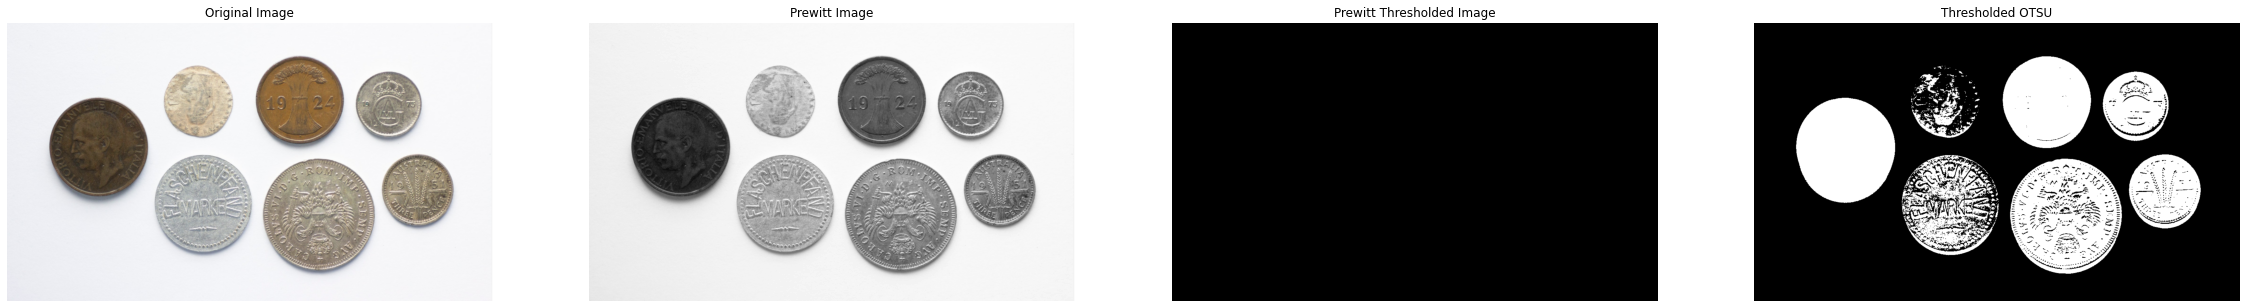

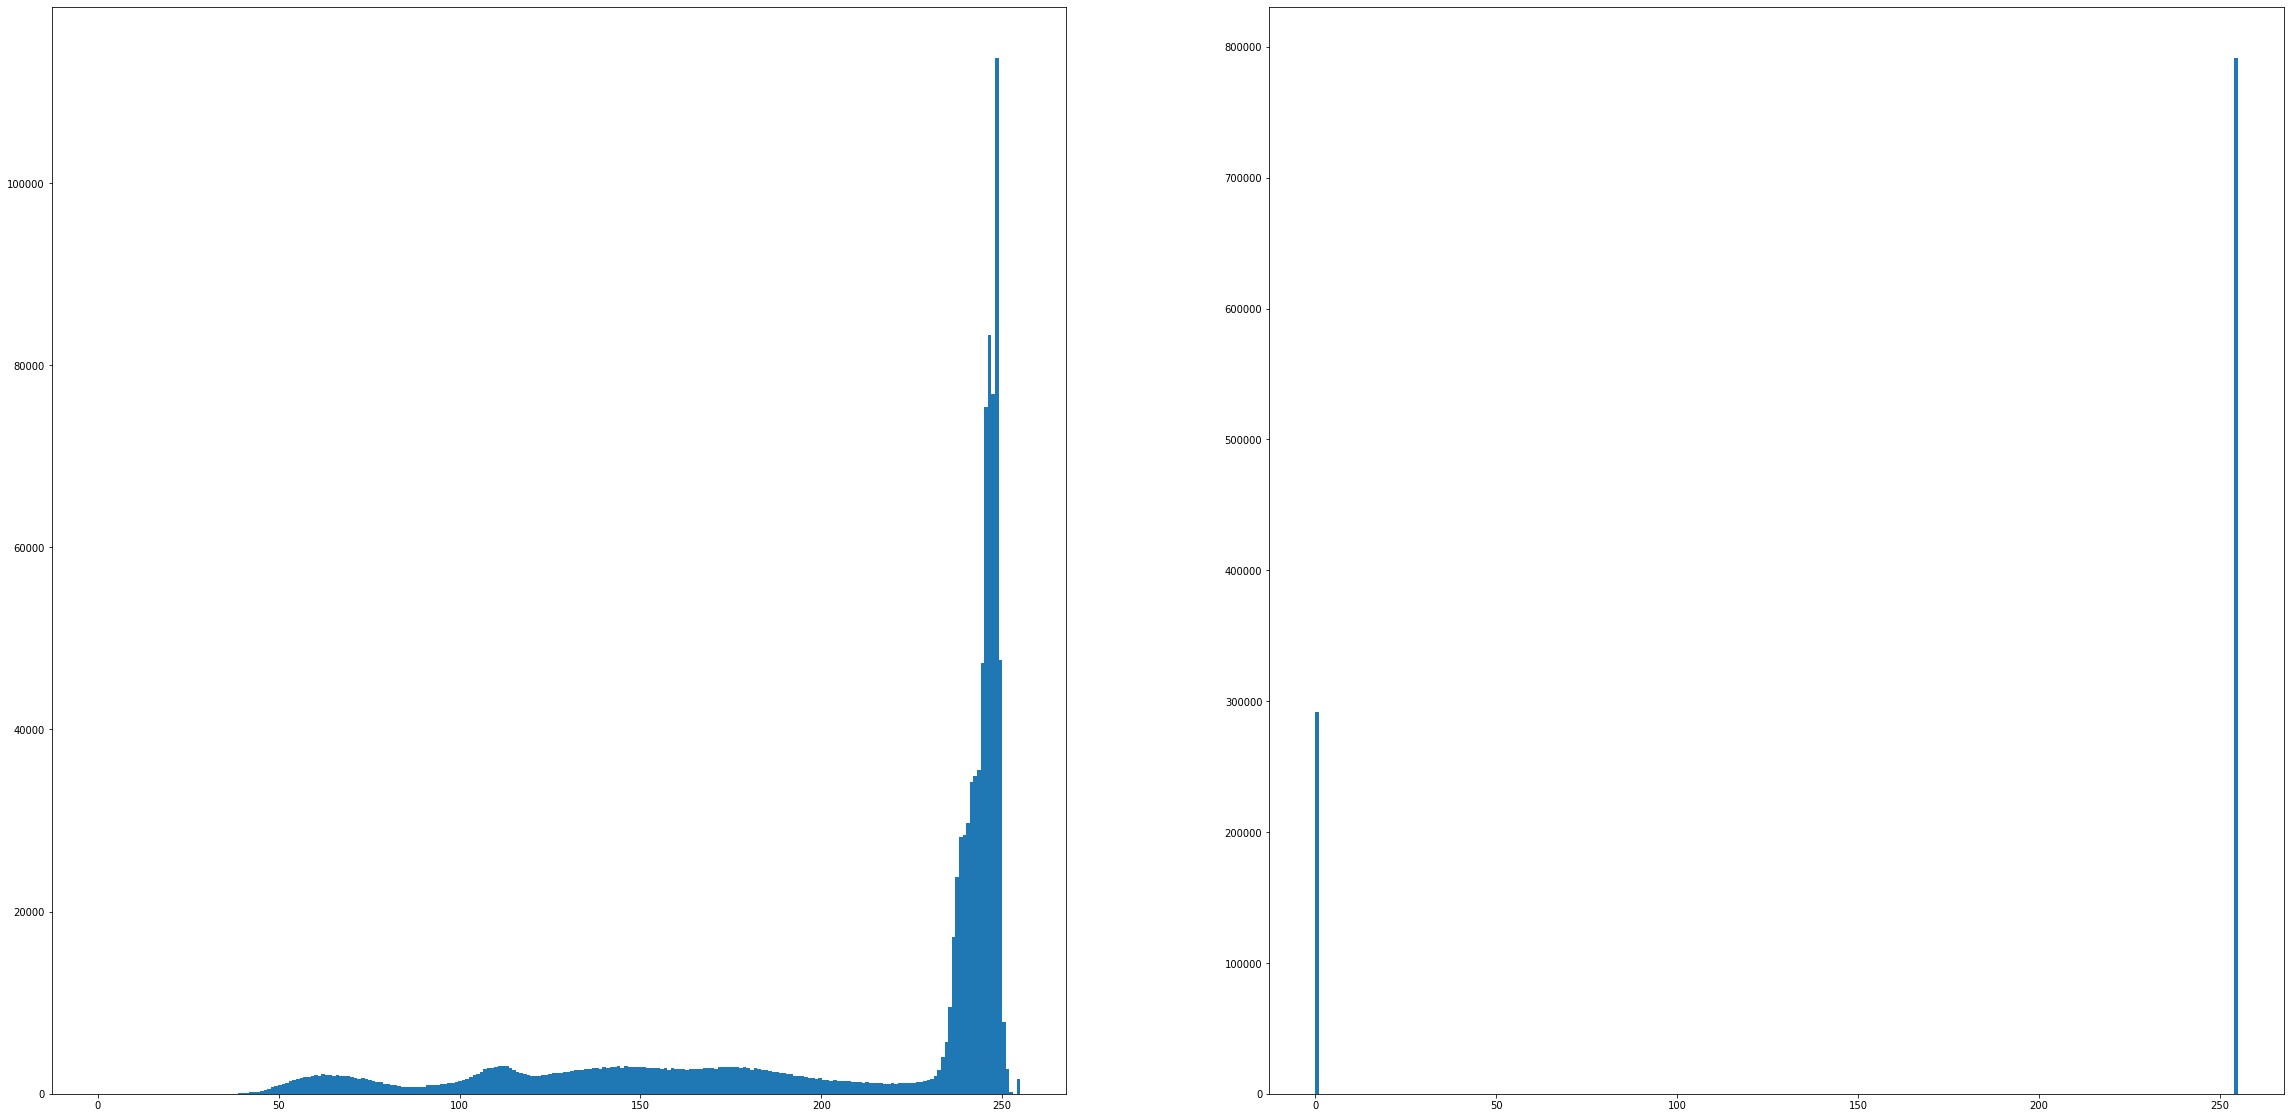

In [2]:
coins=io.imread( 'Tugas Lab 6 - Images/coins.png' )
coins_gray = color.rgb2gray(coins)
# coins_gray = cv.medianBlur(coins_gray,5)
# prewitt = util.img_as_ubyte(filters.prewitt(coins_gray))
_, global_threshold = cv.threshold(coins_gray, 127 , 255 ,cv.THRESH_BINARY)
T = filters.threshold_otsu(coins_gray)
S = util.img_as_float(coins_gray > T)

plt.figure(figsize=( 40 , 20 ))
# Prewitt Method Number 1
plt.subplot( 141 ),plt.imshow(coins)
plt.title( 'Original Image' );plt.axis("off")
plt.subplot( 142 ),plt.imshow(coins_gray,cmap = 'gray' )
plt.title( 'Prewitt Image' );plt.axis("off")
plt.subplot( 143 ),plt.imshow(global_threshold,cmap = 'gray' )
plt.title( 'Prewitt Thresholded Image' );plt.axis("off")
# OTSU Method number 2
plt.subplot(144); plt.imshow(1-S, cmap='gray')
plt.title("Thresholded OTSU"); plt.axis("off")
plt.show()

coins_gray_flatten = util.img_as_ubyte(coins_gray).flatten()
coins_gray_OTSU_flatten = util.img_as_ubyte(S).flatten()
plt.figure(figsize=( 40 , 20 ))
plt.subplot(121);
plt.hist(coins_gray_flatten,256,range=(0,255))
plt.subplot(122);
plt.hist(coins_gray_OTSU_flatten.flatten(),256,range=(0,255))
plt.show()

# 2. Clustering Diberikan sebuah citra jemabatan.jpg

## a. Gunakan algoritma SLIC untuk melakukan segmentasi, lakukan percobaan untuk 10, 50, dan 100 segmen.
## c. Setelah memilih jumlah segmen yang paling baik pada soal 2.b, visualisasikan citra dalam bentuk penyeragaman piksel untuk setiap superpiksel yang telah disegmentasi. Gunakan nilai median untuk memilih piksel yang dipilih untuk setiap superpiksel.

In [58]:
def superpixel_median_image(image, slic_labels):
## Code taken from https://stackoverflow.com/a/57746835 Turn image into superpixel image, given SLIC segment labels.
    im_rp=image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    sli_1d=np.reshape(slic_labels,-1)
    uni=np.unique(sli_1d)
    new_img=np.zeros(im_rp.shape)
    for i in uni:
        loc=np.where(sli_1d==i)[0]
        #print(loc)
        mm=np.median(im_rp[loc,:],axis=0)
        new_img[loc,:]=mm
    return np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')


SLIC number-1 of segments: 6 
SLIC number-2 of segments: 34 
SLIC number-3 of segments: 66 


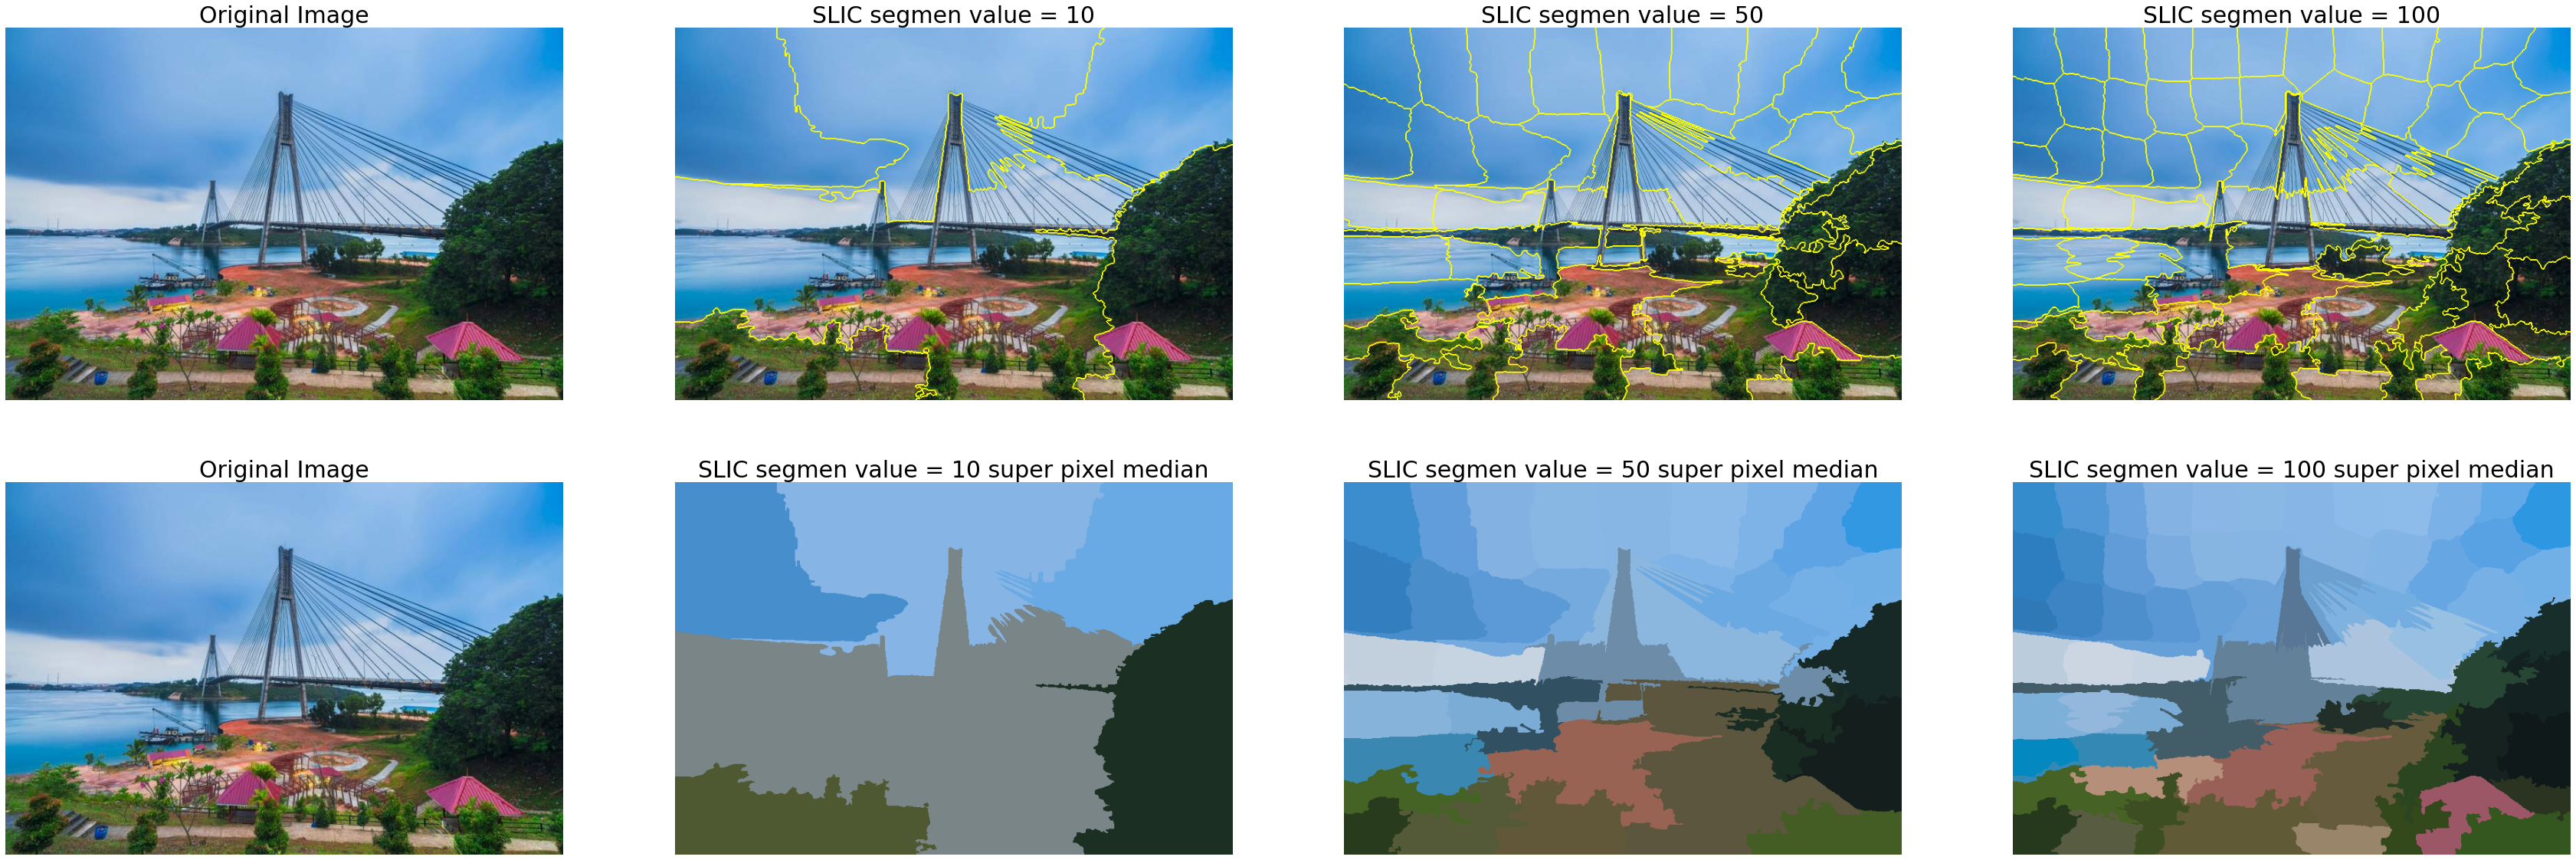

<Figure size 432x288 with 0 Axes>

In [94]:
img = io.imread( 'Tugas Lab 6 - Images\jembatan.jpg')
segments_val = [10, 50, 100]
fig, ax = plt.subplots( 2,len(segments_val)+1, figsize=( 60 , 20 ))
img_buffer = [img.copy,img.copy,img.copy]
segments_slic_buffer = []
for i in range(2):
    ax[i,0].imshow(img)
    ax[i,0].set_title( 'Original Image',fontsize=30)
    ax[i,0].set_axis_off()
for i,val in enumerate(segments_val):
    segments_slic = slic(img, n_segments= val , compactness= 10 , sigma= 1 , start_label= 1 )
    print ( f"SLIC number-{i+1} of segments: { len (np.unique(segments_slic))} " )     
    ax[0,i+1].imshow(mark_boundaries(img, segments_slic))
    ax[0,i+1].set_title( f'SLIC segmen value = {val}',fontsize=30)
    ax[0,i+1].set_axis_off()
    ax[1,i+1].imshow(superpixel_median_image(img,segments_slic))
    ax[1,i+1].set_title( f'SLIC segmen value = {val} super pixel median',fontsize=30)
    ax[1,i+1].set_axis_off()
plt.show()
plt.tight_layout()

## b. Apa yang dapat disimpulkan dari percobaan berbagai jumlah segmen. Jumlah segmen berapa yang menurut Anda paling baik? berikan penjelasannya.


Dari hasil experiment kami dapati bahwa pemilihan jumlah segment mempengaruhi pengelompokan jumlah segment di gambar :
berdasarkan hasil tersebut terlihat bahwa jumlah segment yang dipilih tidak selalu didapati tepat dengan jumlah yang telah di inisialisasi.
sebagai contoh hasil:
- segment 10 didapati hasil segments 6 
- segment 50 didapati hasil segments 34 
- segment 100 didapati hasil segments 66 

Selain itu peng-clusteran dari segment didapat saat baik untuk warna yang jelas berbeda, sebagai contoh pada gambar segmet 34 dan 66 warna awan yang memiliki warna biru,abu-abu, abu-abu gradasi warna biru dll dan pohon dengan variasi warna hijau pada pohon dapat di clusterisasi dengan baik. 
Sedangkan untuk gambar paling bawah meliputi pepohonan dan area jalan kaki tidak dapat terklusterisasi.

sehigga kami beranggapan bahwa algoritma ini memiliki keterbatasan untuk mengclasterisai citra yang memiliki warna bergantian sebagai contoh area pejalan kaki dan pepohonan yang dominan hijau dan abu-abu dan mengkelompokan area tersebut dengan area yang memiliki keragaman warna tidak seperti kasus awan dan pohon dimana cendurung dominan disalah satu warna. Begitu pula dengan area dibawah jembatan yang memiliki keragaman warna.


Sehingga menurut persepsi kami yang paling menrepresentasikan citra secara keseluruhan (bila dikelompokan berdasarkan : awan, daratan, area jembatan dan pepohonan) **segment 50** telah cukup menrepresentasikan gambar secara umum. 

Yang menarik menurut spekulasi kami bila kami menjelaskan point 2.C setelah superpixel gambar warna gambar didapat berubah sesuai dengan median warna dari hasil segmentasi gambar.